<a href="https://colab.research.google.com/github/Pranayshukla0610/ML-projects-portfolio/blob/main/Linear_Regression_on_Global_Energy_Consumption_Forecasting_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import os
os.system('kaggle datasets download -d prasad22/global-energy-consumption')
os.system('unzip global-energy-consumption.zip')

2304

In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/World Energy Consumption.csv.zip')
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22012 entries, 0 to 22011
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 21.7+ MB


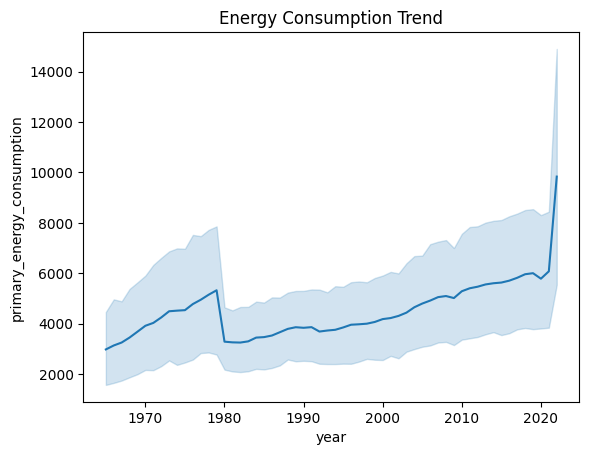

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x="year", y="primary_energy_consumption", data=df)
plt.title("Energy Consumption Trend")
plt.show()

In [16]:
df = df.dropna()

target = "primary_energy_consumption"

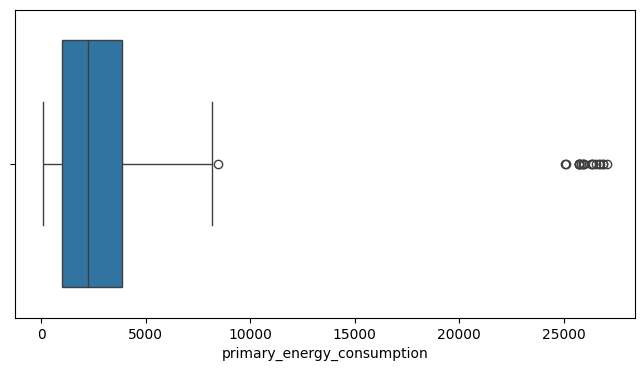

In [17]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["primary_energy_consumption"])
plt.show()

In [18]:
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1

df = df[(df[target] > Q1 - 1.5 * IQR) &
        (df[target] < Q3 + 1.5 * IQR)]

In [19]:
df['energy_per_gdp'] = df['primary_energy_consumption']/(df['gdp']+1)

In [20]:
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359705e+11,46.423,2.750,208.889,8.673,32.273,...,0.000,0.000,4.887,0.003,0.073,1.445,0.06,1.767,0.049,0.008
1072,Argentina,2012,ARG,41952364.0,8.274048e+11,19.876,1.724,247.831,10.397,33.133,...,0.008,0.002,1290.953,0.941,1.014,19.546,0.82,24.174,0.637,0.107
1073,Argentina,2013,ARG,42388268.0,8.473051e+11,14.478,1.505,280.795,11.902,35.387,...,0.008,0.004,22.574,0.221,1.236,23.827,1.01,29.149,0.763,0.126
1074,Argentina,2014,ARG,42824064.0,8.259815e+11,16.710,1.989,324.379,13.891,32.692,...,0.015,0.004,36.646,0.443,1.678,14.478,0.62,39.190,0.470,0.171
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,8.925,1.240,349.792,15.131,33.058,...,0.007,0.004,-4.222,-0.080,1.598,13.639,0.59,36.938,0.428,0.160


In [21]:
df.describe()

,year,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
count,174.000000,1.740000e+02,1.740000e+02,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.00000
mean,2010.522989,5.815131e+07,1.530464e+12,53.670552,1.127966,189.747374,13.488736,159.177828,9.459138,2.615678,...,0.940684,0.437724,76.056310,4.254466,32.240494,210.852966,11.867644,569.362833,3.360787,1.48696
std,4.735433,4.592067e+07,1.225020e+12,238.524809,4.906070,221.868005,37.586856,142.978956,12.659771,2.441001,...,1.458990,0.679323,340.218562,8.645993,48.055869,294.416339,17.694618,794.796935,4.584562,2.08750
min,2000.000000,2.074923e+06,5.279414e+10,-91.427000,-19.942000,0.646000,0.031000,2.879000,0.040000,0.047000,...,0.000000,0.000000,-16.667000,-11.080000,0.011000,0.000000,0.000000,0.516000,0.000000,0.00200
25%,2007.000000,2.024902e+07,3.795307e+11,-2.740000,-0.046750,19.212250,1.097500,53.340750,1.352500,0.917000,...,0.007000,0.003250,2.309500,0.008000,1.102500,13.799000,0.402500,34.897250,0.243250,0.09200
50%,2011.000000,4.666635e+07,1.412233e+12,6.855000,0.137500,126.647500,2.197500,124.254000,5.145000,1.734500,...,0.126000,0.048000,18.333500,0.770500,8.009000,64.436500,2.625000,176.873500,1.315000,0.52100
75%,2014.000000,8.131048e+07,2.208868e+12,25.445000,0.984000,275.287000,10.825000,246.700750,9.565000,3.178750,...,1.508750,0.718250,46.178000,5.067750,41.781750,310.830750,15.935000,846.950250,4.650000,2.04075
max,2018.000000,2.101666e+08,4.732217e+12,2666.627000,32.936000,1136.938000,238.946000,618.597000,52.130000,10.569000,...,6.046000,2.712000,3300.000000,58.644000,217.118000,1194.117000,80.620000,3261.318000,19.771000,9.59000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 1071 to 20583
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 176.7+ KB


In [26]:
df.columns.tolist()

['country',
 'year',
 'iso_code',
 'population',
 'gdp',
 'biofuel_cons_change_pct',
 'biofuel_cons_change_twh',
 'biofuel_cons_per_capita',
 'biofuel_consumption',
 'biofuel_elec_per_capita',
 'biofuel_electricity',
 'biofuel_share_elec',
 'biofuel_share_energy',
 'carbon_intensity_elec',
 'coal_cons_change_pct',
 'coal_cons_change_twh',
 'coal_cons_per_capita',
 'coal_consumption',
 'coal_elec_per_capita',
 'coal_electricity',
 'coal_prod_change_pct',
 'coal_prod_change_twh',
 'coal_prod_per_capita',
 'coal_production',
 'coal_share_elec',
 'coal_share_energy',
 'electricity_demand',
 'electricity_generation',
 'electricity_share_energy',
 'energy_cons_change_pct',
 'energy_cons_change_twh',
 'energy_per_capita',
 'energy_per_gdp',
 'fossil_cons_change_pct',
 'fossil_cons_change_twh',
 'fossil_elec_per_capita',
 'fossil_electricity',
 'fossil_energy_per_capita',
 'fossil_fuel_consumption',
 'fossil_share_elec',
 'fossil_share_energy',
 'gas_cons_change_pct',
 'gas_cons_change_twh',
 

In [27]:
df['renewables_ratio'] = df['renewables_consumption']/(df['primary_energy_consumption']+1)

In [28]:
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,renewables_ratio
1071,Argentina,2011,ARG,41520736.0,8.359705e+11,46.423,2.750,208.889,8.673,32.273,...,0.000,4.887,0.003,0.073,1.445,0.06,1.767,0.049,0.008,0.109023
1072,Argentina,2012,ARG,41952364.0,8.274048e+11,19.876,1.724,247.831,10.397,33.133,...,0.002,1290.953,0.941,1.014,19.546,0.82,24.174,0.637,0.107,0.101660
1073,Argentina,2013,ARG,42388268.0,8.473051e+11,14.478,1.505,280.795,11.902,35.387,...,0.004,22.574,0.221,1.236,23.827,1.01,29.149,0.763,0.126,0.109293
1074,Argentina,2014,ARG,42824064.0,8.259815e+11,16.710,1.989,324.379,13.891,32.692,...,0.004,36.646,0.443,1.678,14.478,0.62,39.190,0.470,0.171,0.110277
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,8.925,1.240,349.792,15.131,33.058,...,0.004,-4.222,-0.080,1.598,13.639,0.59,36.938,0.428,0.160,0.108824


In [29]:
df['energy_growth'] = df.groupby('country')['primary_energy_consumption'].pct_change()
df = df.fillna(0)

In [30]:
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,renewables_ratio,energy_growth
1071,Argentina,2011,ARG,41520736.0,8.359705e+11,46.423,2.750,208.889,8.673,32.273,...,4.887,0.003,0.073,1.445,0.06,1.767,0.049,0.008,0.109023,0.000000
1072,Argentina,2012,ARG,41952364.0,8.274048e+11,19.876,1.724,247.831,10.397,33.133,...,1290.953,0.941,1.014,19.546,0.82,24.174,0.637,0.107,0.101660,0.038076
1073,Argentina,2013,ARG,42388268.0,8.473051e+11,14.478,1.505,280.795,11.902,35.387,...,22.574,0.221,1.236,23.827,1.01,29.149,0.763,0.126,0.109293,0.039940
1074,Argentina,2014,ARG,42824064.0,8.259815e+11,16.710,1.989,324.379,13.891,32.692,...,36.646,0.443,1.678,14.478,0.62,39.190,0.470,0.171,0.110277,-0.001569
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,8.925,1.240,349.792,15.131,33.058,...,-4.222,-0.080,1.598,13.639,0.59,36.938,0.428,0.160,0.108824,0.017433


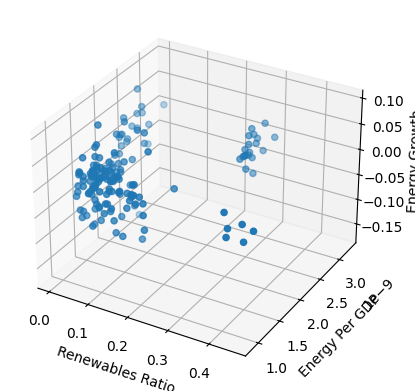

In [32]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df['renewables_ratio'],
    df['energy_per_gdp'],
    df['energy_growth']
)

ax.set_xlabel('Renewables Ratio')
ax.set_ylabel('Energy Per GDP')
ax.set_zlabel('Energy Growth')

plt.show()

In [35]:
X = df.drop(['primary_energy_consumption','country'],axis=1)
y = df['primary_energy_consumption']

In [38]:
X_numeric = X.select_dtypes(include=['number'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test)
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2',r2_score(y_test,y_pred))

RMSE 0.0010062883303375181
R2 0.9999999999995034


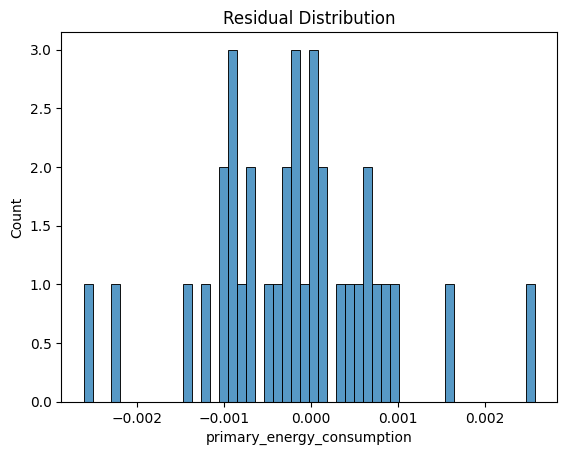

In [42]:
residuals = y_test - y_pred
sns.histplot(residuals, bins=50)
plt.title('Residual Distribution')
plt.show()

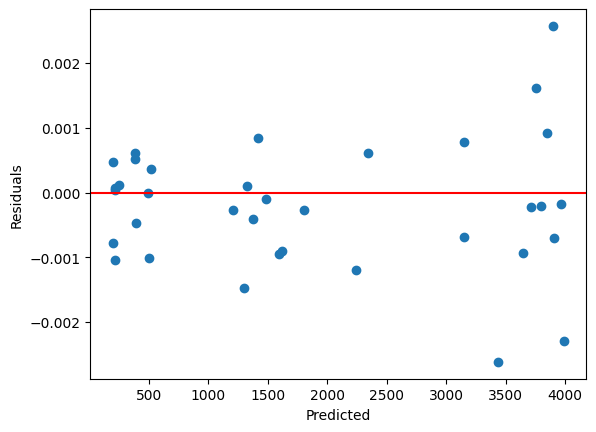

In [43]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

In [45]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:

X_vif = sm.add_constant(X_scaled)

vif = pd.DataFrame()
vif["VIF"] = [
    variance_inflation_factor(X_vif, i)
    for i in range(X_vif.shape[1])
]

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

model_poly = LinearRegression()
model_poly.fit(X_poly,y)

LinearRegression()

In [49]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)

lasso = Lasso(alpha=1.0)
lasso.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.831e+04, tolerance: 3.691e+04
  model = cd_fast.enet_coordinate_descent(


Lasso()